In [24]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

# Задача Коши

### Функция для отрисовки графиков

In [2]:
def draw(x0, xf, h, labels, *args):
    xs = np.arange(x0, xf, h)
    
    plt.figure(figsize=(20,8), dpi= 80)
    
    for (i, ys) in enumerate(args):
        print(len(xs), len(ys), xs[0], ys[0], xs[-1], ys[-1])
        plt.plot(xs, ys, label=labels[i], linewidth=1)
    
    plt.legend()
    plt.show()

### Численые методы решения обыкновенных дифферициальных уравнений

In [3]:
class Exact:
    def __init__(self, solved_equation, h):
        self.f = solved_equation
        self.h = h

    def _next_y(self, xi, yi):
        """
        Считает y[i+1] следующим образом:
            y[i+1] = f(x[i+1])
            
        Функция вынесена таким образом, чтобы в след. методах (классах)
        можно было просто перегрузить ее и получить новый метод не дублируя код.
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        return self.f(xi)

    def calculate(self, x0, y0, xf):
        """
        Вычисляет значения на промежуте [x0;xf] с шагом h выражения f
        :param x0:
        :param y0:
        :param xf:
        :return: список значений приближения для промежутка [x0;xf]
        """
        ys = []
        xs = np.arange(x0 + self.h, xf + self.h, self.h)  # вектор всех значений x
        y = y0
        for x in xs:
            ys.append(y)
            y = self._next_y(x, y)
        return ys

In [4]:
class Euler(Exact):
    def _next_y(self, xi, yi):
        """
        Считает y[i+1] исходя из x[i] и y[i] следующим образом:
            y[i+1] = y[i] + h * f(xi, yi)
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        return yi + self.h * self.f(xi, yi)

In [5]:
class RungeKutta(Euler):
    def _next_y(self, xi, yi):
        """
        Считает y[i+1] исходя из x[i] и y[i] следующим образом:
            y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
            k1 = f(xi, yi)
            k2 = f(xi + h/2, yi + h/2 * k1)
            k3 = f(xi + h/2, yi + h/2 * k2)
            k4 = f(xi + h, yi + h * k3)
        :param xi: x[i]
        :param yi: y[i]
        :return: y[i+1]
        """
        h2 = self.h / 2
        k1 = self.f(xi, yi)
        k2 = self.f(xi + h2, yi + h2 * k1)
        k3 = self.f(xi + h2, yi + h2 * k2)
        k4 = self.f(xi + self.h, yi + self.h * k3)
        return yi + (self.h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

### Решение

$$
\begin{cases}
    y′+y^2=x \\
    y(0)=1 \\
\end{cases} \\
a=0 \ \ b=2
$$

In [6]:
def equation(x, y):
    return x - y**2

In [7]:
X0 = 0
Y0 = 1
H = 0.01
XF = 2 + H

In [8]:
euler = Euler(equation, H)
euler_ys = euler.calculate(X0, Y0, XF)

runge_kutta = RungeKutta(equation, H)
rk_ys = runge_kutta.calculate(X0, Y0, XF)

### Результат алгоритма Эйлера

In [9]:
print('Euler')
n = 0
for u in euler_ys[:10]:
    print("%4f %4f" % (n, u))
    n += H

Euler
0.000000 1.000000
0.010000 0.990100
0.020000 0.980497
0.030000 0.971183
0.040000 0.962151
0.050000 0.953394
0.060000 0.944904
0.070000 0.936676
0.080000 0.928702
0.090000 0.920977


### Результат алгоритма Рунге — Кутта

In [10]:
print('RungeKutta')
n = 0
for u in rk_ys[:10]:
    print("%4f %4f" % (n, u))
    n += H

RungeKutta
0.000000 1.000000
0.010000 0.990248
0.020000 0.980786
0.030000 0.971606
0.040000 0.962703
0.050000 0.954068
0.060000 0.945696
0.070000 0.937579
0.080000 0.929713
0.090000 0.922090


### Графики

201 201 0.0 1 2.0 1.2555003451225228
201 201 0.0 1 2.0 1.2558955978055404


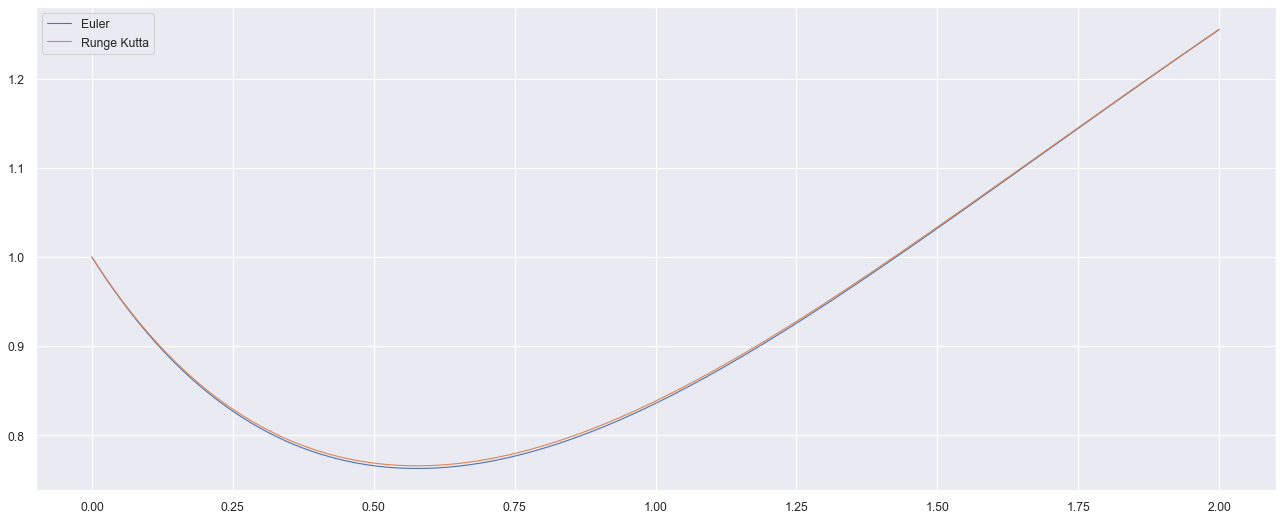

In [11]:
draw(X0, XF, H, ['Euler', 'Runge Kutta'], euler_ys, rk_ys)

# Уравнение теплопроводности

$$
\begin{cases}
    u_t = a^2 u_{xx}, \ \ \ 0 < x < l, \ \ \ 0 < t < T \\
    u(x, 0) = \varphi(x), \ \ \ 0 \leq x \leq l \\
    u(0, t) = \alpha, \ \ \ 0 \leq t \leq T \\
    u(l, t) = \beta, \ \ \ 0 \leq t \leq T \\
\end{cases}
$$

## Решение

$$
\begin{cases}
    u_t = 5 u_{xx}, \ \ \ 0 < x < l, \ \ \ 0 < t < T \\
    u(x, 0) = 6sin(2\pi x) + 13sin(5\pi x), \ \ \ 0 \leq x \leq l \\
    u(0, t) = 0, \ \ \ 0 \leq t \leq T \\
    u(5, t) = 0, \ \ \ 0 \leq t \leq T \\
\end{cases}
$$

### Явная схема

#### Константы

In [12]:
a_2 = 5
T = 1
L = 5

M = 200000
N = 500

delta_t = T/M
delta_x = L/N

alpha = 0
beta = 0

In [13]:
def phi(x):
    return 6*math.sin(2 * math.pi * x) + 13*math.sin(5 * math.pi * x)

In [14]:
#Условие устойчивости явной схемы
D = ((a_2 * delta_t) / (delta_x**2))
if(D > 0.5):
    print("Неустойчиво")

In [15]:
#Вычисление
u_explicit = np.zeros((M + 1, N + 1))
x_explicit = np.arange(0, L + delta_x, delta_x)

for n in range(N + 1):
    u_explicit[0, n] = phi(n*delta_x)
    
for m in range(M + 1):
    u_explicit[m, 0] = alpha
    u_explicit[m, N] = beta
    
for m in range(1, M):
    for n in range(1, N):
        u_explicit[m, n + 1] = u_explicit[m, n] + D * (u_explicit[m + 1, n] - 2 * u_explicit[m, n] + u_explicit[m - 1, n]) 

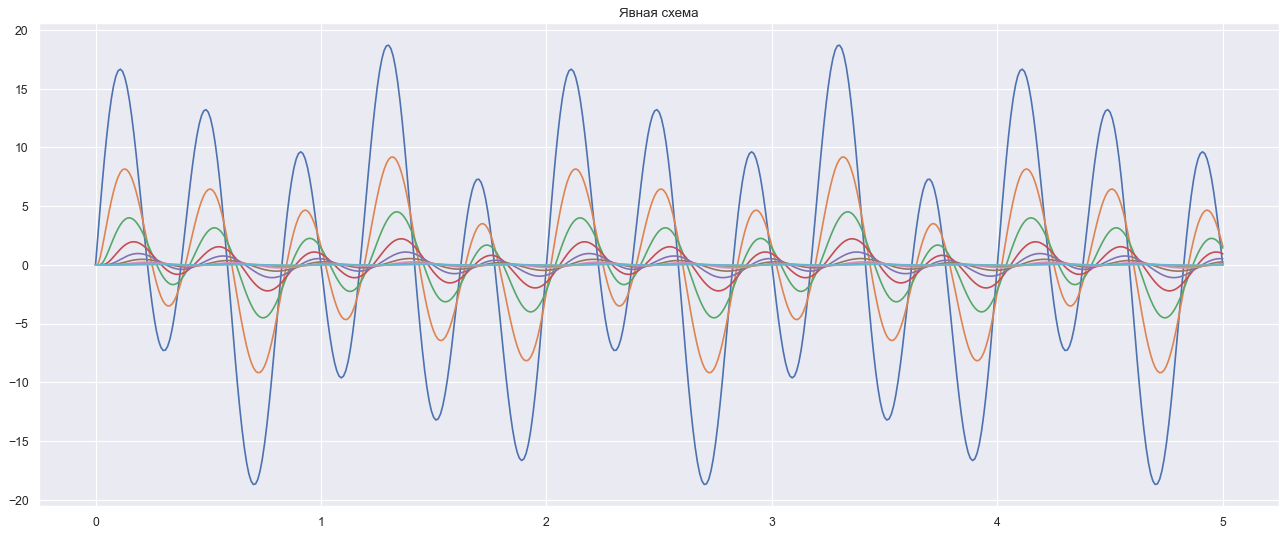

In [42]:
#Отрисовка графика
camera = Camera(plt.figure(figsize = (20,8), dpi = 80))
plt.title("Явная схема")
for i in range(10):
    plt.plot(x_explicit, u_explicit[i])
    camera.snap()

In [43]:
camera.animate(interval = 200, repeat = True, repeat_delay = 500)

### Неявная схема

#### Константы

In [29]:
a_2 = 5
T = 1
L = 5

M = 1000
N = 1000

delta_t = T/M
delta_x = L/N

rho = a_2 * delta_t / (delta_x**2)

alpha = 0
beta = 0

In [30]:
def phi(x):
    return 6*math.sin(2 * math.pi * x) + 13*math.sin(5 * math.pi * x)

In [31]:
def tridiagonal_algo(A, C, B, F):
    n = len(F)
    alf = [0 for i in range(n)]
    bet = [0 for i in range(n)]
    X = [0 for i in range(n)]
    alf[1], bet[1] = -B[0]/C[0], F[0]/C[0]
    
    for i in range(2, n):
        alf[i] = -B[i-1]/(A[i-1]*alf[i-1] + C[i-1])
        bet[i] = (F[i-1] - A[i-1]*bet[i-1])/(A[i-1]*alf[i-1] + C[i-1])
        
    X[n-1] = (F[n-1] - A[n-1]*bet[n-1])/(A[n-1]*alf[n-1] + C[n-1])
    
    for i in reversed(range(n-1)):
        X[i] = alf[i+1]*X[i+1] + bet[i+1]
        
    return X

In [33]:
#Вычисление
u_implicit = np.zeros((M + 1, N + 1))
x_implicit = np.arange(0, L + delta_x, delta_x)

for i in range(N + 1):
    u_implicit[0, i] = phi(x_implicit[i])
    
for m in range(M + 1):
    u_implicit[m, 0] = alpha
    u_implicit[m, N] = beta
    
A = np.zeros(N + 1)
B = np.zeros(N + 1)

for m in range(0, M):
    A[1] = 0
    B[1] = alpha
    for j in range(1, N):
        A[j + 1] = D / (1 - (A[j] - 2) * D)
        B[j + 1] = (u_implicit[m, j] + B[j]  * D)/(1 - (A[j] - 2) * D)
    u_implicit[m + 1, N] = B[N] / (1 - A[N])
    for j in range(N - 1, 0, -1):
        u_implicit[m + 1, j] = A[j + 1] * u_implicit[m + 1, j + 1] + B[j + 1]

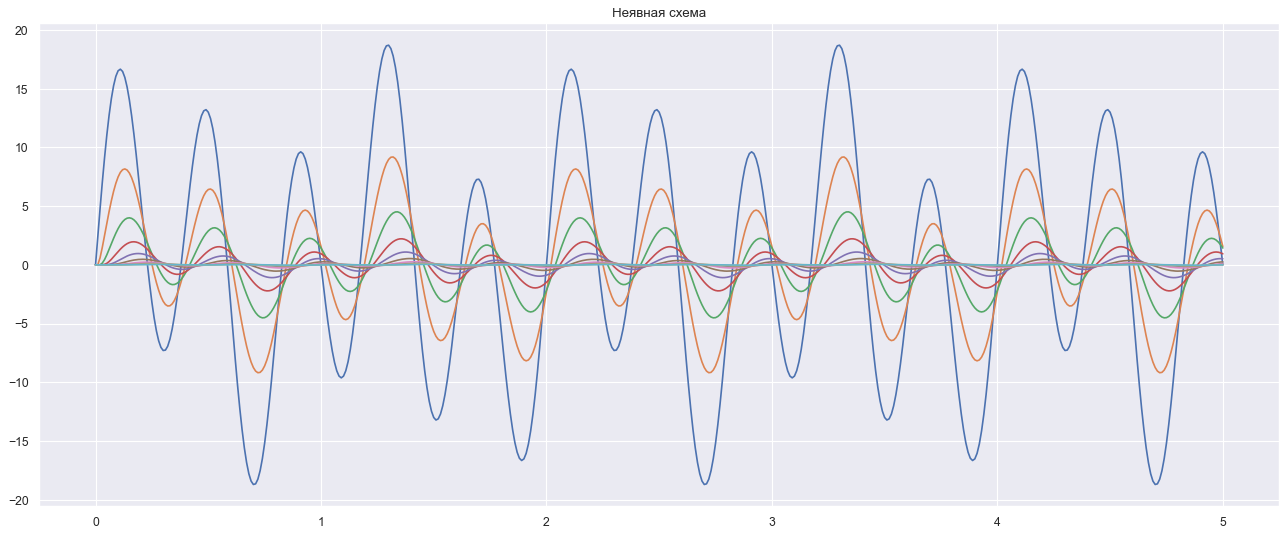

In [40]:
#Отрисовка графика
camera = Camera(plt.figure(figsize = (20,8), dpi = 80))
plt.title("Неявная схема")
for i in range(10):
    plt.plot(x_explicit, u_explicit[i])
    camera.snap()

In [41]:
camera.animate(interval = 200, repeat = True, repeat_delay = 500)